##**Tarefa da Trilha 4 - Paradigmas de Linguagem de Programação em Ciências de Dados**

Para esta tarefa, foram escolhidos os bancos de dados que detalham a mortalidade infantil e a pobreza em diferentes localizações e em diferentes anos. Estes dados foram extraídos do site https://www.gapminder.org/

Link Github - 

In [207]:
import pandas as pd

child = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--number_of_child_deaths--by--geo--time.csv')

child.head()


,geo,time,number_of_child_deaths
0,abw,1980,36
1,abw,1981,35
2,abw,1982,34
3,abw,1983,33
4,abw,1984,32


In [208]:
child_BR = child[ child.geo == 'bra' ]
child_BR

,geo,time,number_of_child_deaths
4814,bra,1800,66000
4815,bra,1801,66710
4816,bra,1802,67430
4817,bra,1803,68150
4818,bra,1804,68880
...,...,...,...
5025,bra,2011,46880
5026,bra,2012,47450
5027,bra,2013,49090
5028,bra,2014,51120


In [209]:
child_BR = child_BR.rename(columns={'geo':'country','time':'year', 'number_of_child_deaths': 'death'})
child_BR.head()

,country,year,death
4814,bra,1800,66000
4815,bra,1801,66710
4816,bra,1802,67430
4817,bra,1803,68150
4818,bra,1804,68880


In [210]:
child_USA = child[ child.geo == 'usa' ]
child_USA = child_USA.rename(columns={'geo':'country','time':'year', 'number_of_child_deaths': 'death'})
child_USA.head()

,country,year,death
38194,usa,1800,152200
38195,usa,1801,154600
38196,usa,1802,157100
38197,usa,1803,159500
38198,usa,1804,162100


In [211]:
child_IND = child[ child.geo == 'ind' ]
child_IND = child_IND.rename(columns={'geo':'country','time':'year', 'number_of_child_deaths': 'death'})
child_IND.head()

,country,year,death
16599,ind,1800,3561000
16600,ind,1801,3568000
16601,ind,1802,3575000
16602,ind,1803,3582000
16603,ind,1804,3590000


In [212]:
poverty = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--number_of_people_in_poverty--by--geo--time.csv')
poverty.head()

,geo,time,number_of_people_in_poverty
0,ago,2000,7.56300
1,ago,2009,8.20800
2,alb,1996,0.00634
3,alb,2002,0.02228
4,alb,2004,0.01598


In [213]:
poverty_BR = poverty[ poverty.geo == 'bra' ]
poverty_BR

,geo,time,number_of_people_in_poverty
140,bra,1981,17.000
141,bra,1982,17.420
142,bra,1983,21.720
143,bra,1984,20.670
144,bra,1985,18.420
145,bra,1986,13.490
146,bra,1987,19.340
147,bra,1988,21.210
148,bra,1989,20.160
149,bra,1990,24.290


In [214]:
poverty_BR = poverty_BR.rename(columns={'geo':'country','time':'year', 'number_of_people_in_poverty': 'poverty'})
poverty_BR.head()

,country,year,poverty
140,bra,1981,17.00
141,bra,1982,17.42
142,bra,1983,21.72
143,bra,1984,20.67
144,bra,1985,18.42


In [215]:
poverty_USA = poverty[ poverty.geo == 'usa' ]
poverty_USA = poverty_USA.rename(columns={'geo':'country','time':'year', 'number_of_people_in_poverty': 'poverty'})
poverty_USA.head()

,country,year,poverty
1054,usa,1986,1.633
1055,usa,1991,1.695
1056,usa,1994,1.763
1057,usa,1997,2.727
1058,usa,2000,1.890


In [216]:
BR = pd.merge(child_BR,poverty_BR,on=['country','year'])
BR.head()

,country,year,death,poverty
0,bra,1981,359500,17.00
1,bra,1982,345800,17.42
2,bra,1983,331000,21.72
3,bra,1984,315500,20.67
4,bra,1985,299300,18.42


In [217]:
USA = pd.merge(child_USA,poverty_USA,on=['country','year'])
USA.head()
USA.tail()

,country,year,death,poverty
3,usa,1997,34290,2.727
4,usa,2000,31520,1.890
5,usa,2004,33570,2.928
6,usa,2007,32980,4.006
7,usa,2010,29940,5.166


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Correlação entre Mortalidade Infantil e Pobreza no Brasil**

---



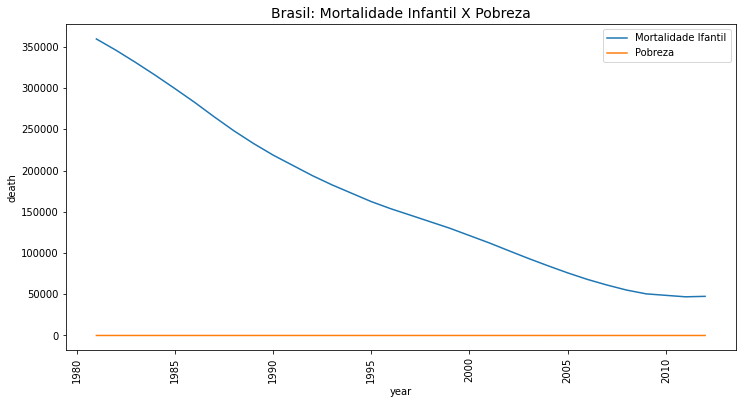

In [219]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=BR.death, label='Mortalidade Ifantil')
sns.lineplot(x=BR.year, y=BR.poverty, label='Pobreza')

plt.title('Brasil: Mortalidade Infantil X Pobreza', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

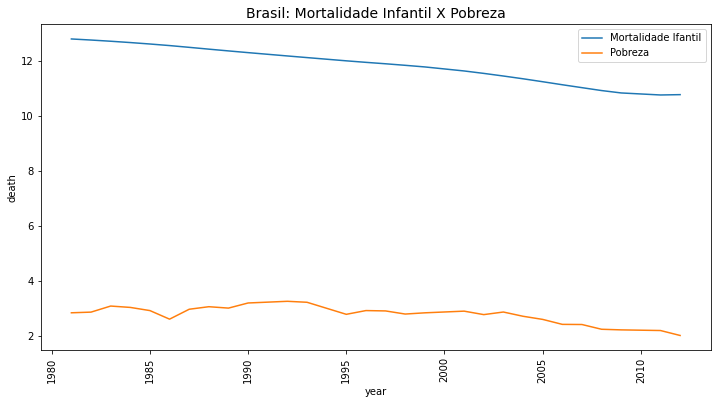

In [220]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( BR.death ), label='Mortalidade Ifantil')
sns.lineplot(x=BR.year, y=np.log( BR.poverty ), label='Pobreza')

plt.title('Brasil: Mortalidade Infantil X Pobreza', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Analisando os gráficos acima, é possível observar que a pobreza e a mortalidade infantil no Brasil apresentam uma ligeira queda ao longo dos anos.

**Correlação da Mortalidade Infantil entre Brasil e Estados Unidos**

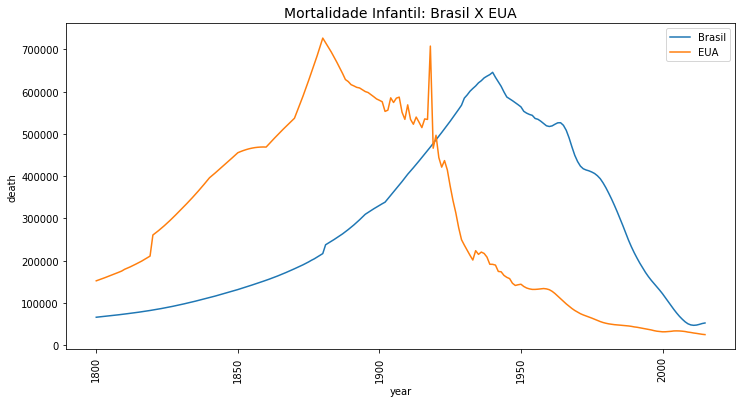

In [221]:
plt.figure(figsize=(12,6))

sns.lineplot(x=child_BR.year, y=child_BR.death, label='Brasil')
sns.lineplot(x=child_USA.year, y=child_USA.death, label='EUA')

plt.title('Mortalidade Infantil: Brasil X EUA', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

É possível observar no gráfico que ambos países tiveram um pico de mortalidade seguido de queda, porém nos EUA tanto o pico quanto a queda ocorreram com cerca de 50 anos de diferença, sendo os EUA mais rápidos na resolução do problema.

**Correlação entre Mortalidade Infantil e Pobreza nos Estados Unidos**


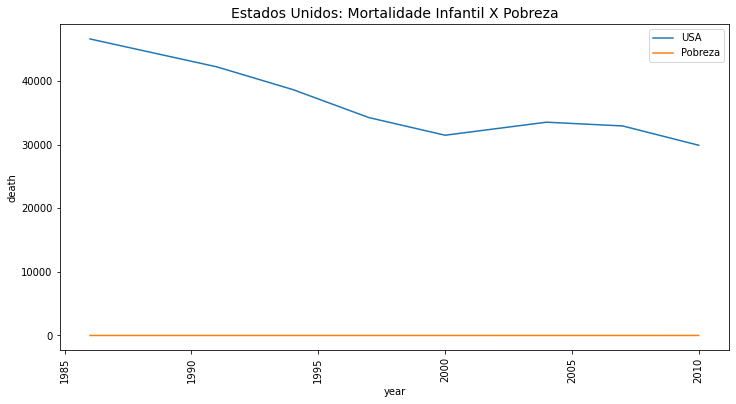

In [222]:
plt.figure(figsize=(12,6))

sns.lineplot(x=USA.year, y=USA.death, label='USA')
sns.lineplot(x=USA.year, y=USA.poverty, label='Pobreza')

plt.title('Estados Unidos: Mortalidade Infantil X Pobreza', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

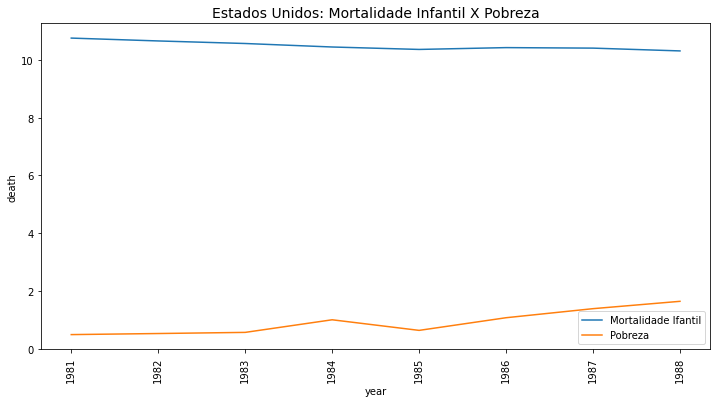

In [224]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( USA.death ), label='Mortalidade Ifantil')
sns.lineplot(x=BR.year, y=np.log( USA.poverty ), label='Pobreza')

plt.title('Estados Unidos: Mortalidade Infantil X Pobreza', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

De acordo com os gráficos acima, é possível observar que nos Estaods Unidosa nortalidade infantil apresenta ligeira queda, enquanto o nível de pobreza tem apresentado ligeira ascensão.

**Mortalidade Infantil: Brasil, Estados Unidos e Índia**

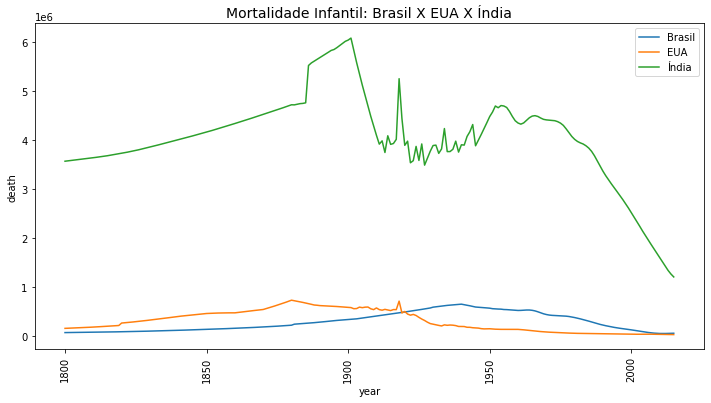

In [223]:
plt.figure(figsize=(12,6))

sns.lineplot(x=child_BR.year, y=child_BR.death, label='Brasil')
sns.lineplot(x=child_USA.year, y=child_USA.death, label='EUA')
sns.lineplot(x=child_IND.year, y=child_IND.death, label='Índia')

plt.title('Mortalidade Infantil: Brasil X EUA X Índia', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Neste gráfico é possível perceber que a mortalidade infantil na Índia, apesar de estar em queda, é muito maior do que no Brasil e nos EUA ao longo dos anos.